nuclear not green and stuc for 10 years
forecasts for produciton/consuption per type and region
predictions 6 years back (try to find datasets covering periods before covid)
plan horizon for most companies 3 years
find a region to use as example (österåker/osteraker)


In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import streamlit as st
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from jupyter_dash import JupyterDash
from dash import Dash, dcc, html, Input, Output


In [38]:
leveranser_flytande = pd.read_table('../data/to-use/leveranser-flytande-bransle-region-ar.csv', sep=',')
elproduction_bransleanvandning = pd.read_table('../data/to-use/elproduction-bransleanvandning-region-produktionssatt-bransletyp-ar.csv', sep=',')
fjarrvarmeproduktion = pd.read_table('../data/to-use/fjarrvarmeproduktion-region-produktionssatt-bransletyp-ar.csv', sep=',')
slutanvandning = pd.read_table(
    '../data/to-use/slutanvandning-region-forbrukarkategori-bransletyp-kategori-energityp-ar.csv', sep=',')
branslefarbrukning = pd.read_table('../data/to-use/branslefarbrukning-far-produktion-per-ar.csv', sep=',')
energidata = pd.read_table('../data/to-use/energidata-per-ar.csv', sep=',')


In [42]:
leveranser_flytande = leveranser_flytande.set_index('region')


In [43]:
leveranser_flytande

,bransletyp,ar,m3,forbrukarkategori,fornybar_bransletyp
region,,,,,
00 Riket,motorbensin,2001,5442.6,NaN,icke-fornybar
00 Riket,dieselbr�nsle,2001,3530.0,NaN,icke-fornybar
00 Riket,etanol,2001,0.0,NaN,fornybar
00 Riket,E85,2001,0.0,NaN,icke-fornybar
00 Riket,FAME,2001,0.0,NaN,fornybar
...,...,...,...,...,...
2584 Kiruna,HVO,2021,0.0,flerbostadshus,fornybar
2584 Kiruna,HVO,2021,0.0,�vriga fastigheter,fornybar
2584 Kiruna,HVO,2021,199.0,v�gtransporter,fornybar


In [16]:
datasets = [leveranser_flytande, elproduction_bransleanvandning, 
            fjarrvarmeproduktion, slutanvandning, branslefarbrukning, energidata]

variables = ['region', 'bransletyp', 'ar', 'm3', 'farbrukarkategori', 'produktionssatt',
             'MWh', 'kategori', 'energityp', 'produktionsslag', 'branslefarbrukning']



In [17]:
for d in datasets:
    d.ar = d.ar.astype(int)

In [18]:
for d in datasets:
    name = [x for x in globals() if globals()[x] is d][0]
    print('Dataframe: ', name)
    
    contains_nulls = d.isna().sum().sum()
    print('Number of Nuls: ', contains_nulls, 'out of', len(d))
    print(d.describe(include='object'))



Dataframe:  leveranser_flytande
Number of Nuls:  214174 out of 353854
               region bransletyp           forbrukarkategori  \
count          353854     353854                      279360   
unique            313         23                          11   
top     1461 Mellerud     etanol  jordbruk, skogsbruk, fiske   
freq             1198      40241                       27936   

       fornybar_bransletyp  
count               353854  
unique                   3  
top          icke-fornybar  
freq                217168  
Dataframe:  elproduction_bransleanvandning
Number of Nuls:  0 out of 194832
          region                         produktionssatt    bransletyp  \
count     194832                                  194832        194832   
unique       313                                       5             9   
top     00 Riket  kraftv�rmeverk + industriellt mottryck  elproduktion   
freq         624                                   41220         23728   

       fornybar_b

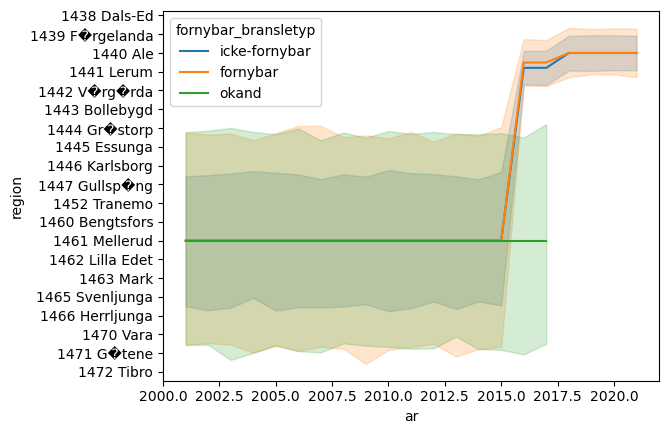

In [20]:
# leveranser_flytande

fig1 = sns.lineplot(data=leveranser_flytande, x='ar',
                    y='region', hue='fornybar_bransletyp')
plt.show(fig1)

        # print('Column: ', column, '\n', d[column].drop_duplicates(
        #     keep='first').reset_index(drop=True))

        # fig1 = sns.lineplot(data=d, x='ar', y=d[column])

        # # fig2 = sns.lineplot(data=d, x='ar', y=d[column], hue='region')
        # # plt.show(fig2)


    


Problem statement:

Situation: Energy is produced in different forms and consumed by the regions in different rates.   

Complication: Energy prices are increasing due to many reasons including but not limited to war, logistics and sanctions.   

Question: Is it possible to see what types of energy have been historically produced and consumed by the different regions? Is it possible to predict how the productions and consumption will look like in the future?   

Answer: ???
